In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
Bronowice = pd.read_csv("results/bronowice_exmas_30.csv", index_col=0)
Bronowice['Area']='Bronowice'
Skotniki = pd.read_csv("results/skotniki_exmas_30.csv", index_col=0)
Skotniki['Area']='Skotniki'
df = pd.concat([Bronowice, Skotniki])
df['prob of choosing'] = df['p_SUM']
df['reduction in waiting times for PT'] = df['tw_PT_OD'] - df['tw_PT_HD']
df['new service attractiveness'] = df['u_PT_OD']-df['u_SUM_OD']
mu = -0.1
df['added value'] = np.log(np.exp(mu*df['u_PT_OD'])+np.exp(mu*df['u_SUM_OD'])-np.log(np.exp(mu*df['u_PT_OD'])))
df

,tw_PT_OD,tw_PT_HD,u_PT_OD,u_PT_HD,u_SUM_OD,p_SUM,Area,prob of choosing,reduction in waiting times for PT,new service attractiveness,added value
0,128.466667,54.095238,13.757178,10.337935,16.270895,0.281675,Bronowice,0.281675,74.371429,-2.513717,0.601512
1,150.261905,64.271429,13.917733,10.624183,16.528026,0.326104,Bronowice,0.326104,85.990476,-2.610293,0.605364
2,91.608491,50.495283,13.094119,10.285202,16.194357,0.238505,Bronowice,0.238505,41.113208,-3.100238,0.575152
3,111.009569,56.277512,13.212084,10.083533,15.840038,0.341442,Bronowice,0.341442,54.732057,-2.627954,0.583987
4,107.473430,53.990338,13.077229,10.010248,15.932429,0.261412,Bronowice,0.261412,53.483092,-2.855200,0.577413
5,135.418269,60.716346,13.656377,10.374594,16.313940,0.308030,Bronowice,0.308030,74.701923,-2.657563,0.596918
6,111.389423,48.966346,13.158962,10.092945,16.114751,0.313038,Bronowice,0.313038,62.423077,-2.955790,0.578703
7,166.823810,62.138095,14.144115,10.755493,16.659732,0.295265,Bronowice,0.295265,104.685714,-2.515617,0.613285
8,124.129808,53.418269,13.588691,10.212657,16.152118,0.223646,Bronowice,0.223646,70.711538,-2.563428,0.595903
9,128.516588,66.341232,13.524253,10.707021,16.702427,0.154262,Bronowice,0.154262,62.175355,-3.178174,0.587364


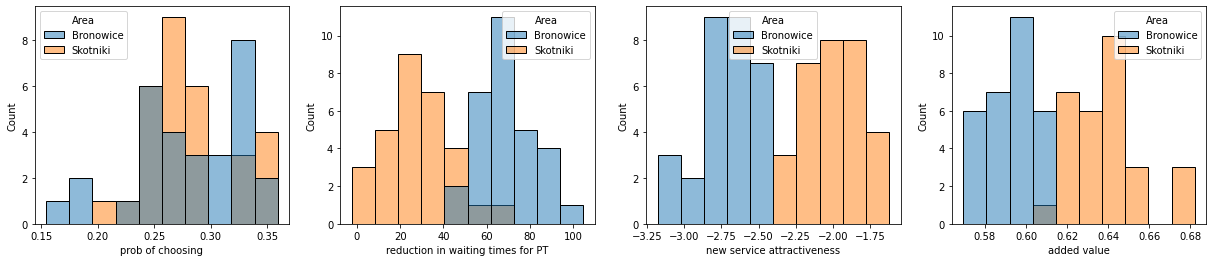

In [14]:
fig, ax = plt.subplots(1,4, figsize=(21,4))
                       
for i, col in enumerate(df.columns[-4:]):
    sns.histplot(data = df, x = col,  hue = 'Area', bins = 10, ax = ax[i])
    

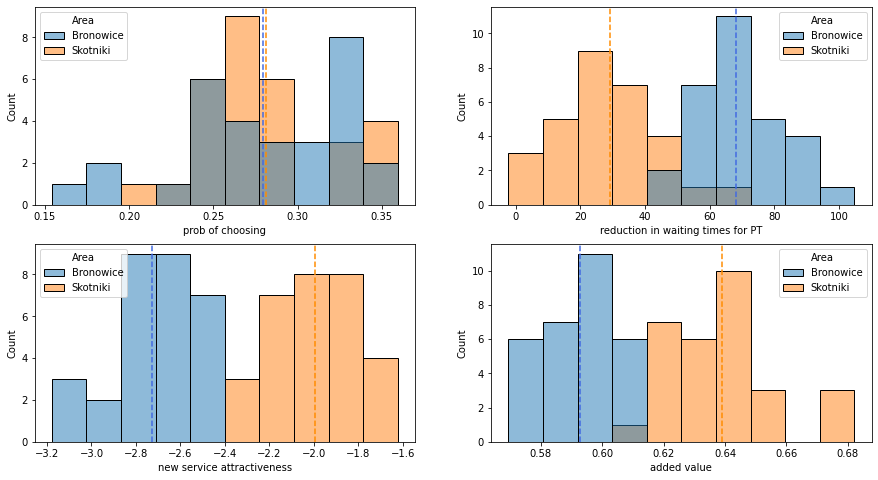

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

d = df.groupby('Area').mean()
cols = df.columns[-4:]                       

for col, a in zip(cols, ax.flat):
    sns.histplot(data = df, x = col,  hue = 'Area', bins = 10, ax=a)

    a.axvline(d.loc['Bronowice', col], linestyle='--', color="royalblue")
    a.axvline(d.loc['Skotniki', col], linestyle='--', color="darkorange")

In [18]:
d = df.groupby('Area').mean()
d = round(d, 3)
d

,tw_PT_OD,tw_PT_HD,u_PT_OD,u_PT_HD,u_SUM_OD,p_SUM,prob of choosing,reduction in waiting times for PT,new service attractiveness,added value
Area,,,,,,,,,,
Bronowice,123.815,55.681,13.544,10.341,16.272,0.279,0.279,68.133,-2.728,0.593
Skotniki,144.596,115.410,14.804,11.113,16.801,0.281,0.281,29.186,-1.997,0.639


In [48]:
d.to_csv("results/results_SUM.csv")